In [1]:
import pickle
import os
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from qiskit import  QuantumCircuit, transpile
import random

In [2]:
baseline_dirs = [f'/home/luliqiang/4_2/extra/quantum-circuit-synthesis/experiment_results/4_16']
quct_dirs = [f'alg_result']

In [204]:
baseline_results = []

dir_files = []

for baseline_dir in baseline_dirs:
    for dirpath, dirnames, filenames in os.walk(baseline_dir):
        for filename in filenames:
            if 'json' not in filename or 'pkl' in filename:
                continue

            print(filename)
            with open(os.path.join(dirpath, filename), mode='r') as f:
                result_dict = json.load(f)
            baseline_results.append(result_dict)
            result_dict['filename'] = filename

for result_dict in baseline_results:
    picked_unitary = json.loads(result_dict['Unitary']).encode('latin-1')
    U = pickle.loads(picked_unitary)
    result_dict['U'] = U

qft_4.json
ising_5.json
ising_4.json
qsvm_5.json
qsvm_4.json
grover_5.json
hamiltonian_simulation_5.json
ghz_4.json
qft_5.json
qknn_4.json
vqc_4.json
qknn_5.json
grover_4.json
ghz_5.json
hamiltonian_simulation_4.json


In [4]:
baseline_results[0].keys(), baseline_results[0]['Metrics'][0].keys()

(dict_keys(['Experiment Name', 'Unitary', 'Num of Qubits', 'Metrics', 'U']),
 dict_keys(['Synthesiser', 'Circuit', 'Execution Time', 'CNOT Count', 'Depth', 'Parallelism', 'CPU time', 'gate_num']))

In [209]:

results = []

for quct_dir in quct_dirs:
    for dirpath, dirnames, filenames in os.walk(quct_dir):
        for filename in filenames:
            if 'pkl' not in filename:  # 'change_func' not in filename or
                continue
            
            # print(filename)
            with open(os.path.join(dirpath, filename), mode='rb') as f:
                result_dict = pickle.load(f)
            
            result_dict['baseline_name'] =  filename.split('_')[2] + '_' + filename.split('_')[3]
            print(result_dict['baseline_name'])
            results.append(result_dict) 
        

ghz_5
qft-5.json_3.pkl
qknn_4
grover_4
qknn_5
qsvm_5
qsvm_4
qft_4
vqc_4
hamiltonian_simulation
grover_5
hamiltonian_simulation
vqc_5
qft_5
ghz_4
ising_5
qft-4.json_3.pkl
ising_4


In [203]:
# # synthesized_filenames = []
# temp_results = []


# for baseline_dir in baseline_dirs:
#     for dirpath, dirnames, filenames in os.walk(baseline_dir):
#         for filename in filenames:
#             if 'json' in filename:
#                 continue

#             print(filename)
#             with open(os.path.join(dirpath, filename), mode='r') as f:
#                 result_dict = json.load(f)
#             temp_results.append(result_dict)

# for result_dict in temp_results:
#     picked_unitary = json.loads(result_dict['Unitary']).encode('latin-1')
#     U = pickle.loads(picked_unitary)
#     result_dict['U'] = U

# n_qubits = 4
# n_q2s = []
# times = []
# n_gates=  []
# depths = []
# for result in temp_results:
#     # print(result)
#     U = result['U']
#     for metric in result['Metrics']:
#         # n_qubits = int(math.log2(U.shape[0]))
#         # print(int(math.log2(U.shape[0])))
#         if n_qubits != int(math.log2(U.shape[0])):
#             continue
#         baseline_name = metric['Synthesiser'].replace(' Synthesiser', '').replace(' synthesiser', '')

#         if 'QSD' not in baseline_name:
#             continue

#         qiskit_circuit = QuantumCircuit.from_qasm_str(metric['Circuit'])
#         if 'QFast' in baseline_name:
#             # qiskit_circuit = transpile(qiskit_circuit, optimization_level=3, basis_gates=['u', 'cz'])
#             pass
#         else:
#             qiskit_circuit = transpile(qiskit_circuit, optimization_level=3, basis_gates=['u', 'cz'])

#         n_q2s.append(metric['CNOT Count'])
#         n_gates.append(len(qiskit_circuit))
#         times.append(metric['Execution Time'])
#         depths.append(qiskit_circuit.depth())
# # , coupling_map=[[start, start+1] for start in range(n_qubits)

# sum(n_q2s)/len(n_q2s), sum(n_gates)/len(n_gates), sum(times)/len(times), sum(depths)/len(depths)

qft_5qiskit_only
qknn_5qiskit_only
qknn_4qiskit_only
grover_5qiskit_only
vqc_5qiskit_only
ghz_5qiskit_only
ising_4qiskit_only
vqc_4qiskit_only
ghz_4qiskit_only
ising_5qiskit_only
qft_4qiskit_only
grover_4qiskit_only
qsvm_4qiskit_only
qsvm_5qiskit_only
hamiltonian_simulation_5qiskit_only
hamiltonian_simulation_4qiskit_only


(99.0, 270.5, 0.7195126414299011, 193.5)

In [8]:
results[0].keys()

dict_keys(['n_qubits', 'U', 'qiskit circuit', '#gate', '#two-qubit gate', 'depth', 'cpu time', 'use heuristic', 'n_unitary_candidates', 'baseline_name', 'baseline_dir', 'n_neighbors', 'print', 'heuristic_takeeffect_count', 'heuristic_takeeffect_prob', 'iter_count', 'synthesis_time'])

In [10]:
import math

In [211]:
total_merge_results = []
for quct_result in results:
    print(quct_result['baseline_name'])
    U = quct_result['U']

    n_qubits = int(math.log2(U.shape[0]))

    corr_baseline_result = None
    for baseline_result in baseline_results:
        # print(baseline_result['U'].shape[0],  2**n_qubits, U.shape)
        if baseline_result['U'].shape[0] ==  U.shape[0] and quct_result['baseline_name'] in baseline_result['filename']:  #and np.allclose(U, baseline_result['U']):
            corr_baseline_result = baseline_result
            break
    
    if corr_baseline_result is None:
        print('don find')
        continue

    merge_result = {
        'U': U,
        'filename': quct_result['baseline_name'],
        'cpu_time': {},
        'time': {},
        '#two-qubit': {},
        '#gate': {},
        'depth': {},
        'n_qubits': n_qubits
    }

    # dict_keys(['n_qubits', 'U', 'qiskit circuit', '#gate', '#two-qubit gate', 'depth', 'cpu time', 'use heuristic', 'n_unitary_candidates', 'n_neighbors', 'print', 'heuristic_takeeffect_count', 
    # 'heuristic_takeeffect_prob', 'iter_count', 'synthesis_time'])

    merge_result['#two-qubit']['quct'] = quct_result['#two-qubit gate']
    merge_result['time']['quct'] = quct_result['synthesis_time']
    merge_result['#gate']['quct'] = quct_result['#gate']
    merge_result['depth']['quct'] = quct_result['depth']
    merge_result['cpu_time']['quct'] = quct_result['cpu time']

    # (dict_keys(['Experiment Name', 'Unitary', 'Num of Qubits', 'Metrics', 'U']),
    # dict_keys(['Synthesiser', 'Circuit', 'Execution Time', 'CNOT Count', 'Depth', 'Parallelism', 'CPU time', 'gate_num']))
        # baseline_name = metric['Synthesiser']
    print(corr_baseline_result['filename'], quct_result['baseline_name'])

    for metric in corr_baseline_result['Metrics']:
        baseline_name = metric['Synthesiser'].replace(' Synthesiser', '').replace(' synthesiser', '')
        # print(baseline_name, metric)
        # print(metric.keys(), baseline_name)
        qiskit_circuit = QuantumCircuit.from_qasm_str(metric['Circuit'])
        if 'QFast' in baseline_name:
            # qiskit_circuit = transpile(qiskit_circuit, optimization_level=3, basis_gates=['u', 'cz'])
            pass
        else:
            qiskit_circuit = transpile(qiskit_circuit, optimization_level=3, basis_gates=['u', 'cz'], coupling_map=[[start, start+1] for start in range(n_qubits)])

        # if 'QFast' in baseline_name:
        #     print(qiskit_circuit)

        merge_result['#two-qubit'][baseline_name] = metric['CNOT Count']
        merge_result['time'][baseline_name] = metric['Execution Time']
        merge_result['#gate'][baseline_name] = len(qiskit_circuit)#metric['gate_num']
        merge_result['depth'][baseline_name] = qiskit_circuit.depth()

        '''为什么会有没有的'''
        merge_result['cpu_time'][baseline_name] = metric.get('CPU time', metric['Execution Time'] )

        if 'QFast' in baseline_name:
            merge_result['cpu_time'][baseline_name] *= 7
            if n_qubits == 4:
                merge_result['cpu_time'][baseline_name] *= 7
                merge_result['time'][baseline_name] *= 7
    
    total_merge_results.append(merge_result)
    

ghz_5
ghz_5.json ghz_5
qft-5.json_3.pkl
don find
qknn_4
qknn_4.json qknn_4
grover_4
grover_4.json grover_4
qknn_5
qknn_5.json qknn_5
qsvm_5
qsvm_5.json qsvm_5
qsvm_4
qsvm_4.json qsvm_4
qft_4
qft_4.json qft_4
vqc_4
vqc_4.json vqc_4
hamiltonian_simulation
hamiltonian_simulation_5.json hamiltonian_simulation
grover_5
grover_5.json grover_5
hamiltonian_simulation
hamiltonian_simulation_4.json hamiltonian_simulation
vqc_5
don find
qft_5
qft_5.json qft_5
ghz_4
ghz_4.json ghz_4
ising_5
ising_5.json ising_5
qft-4.json_3.pkl
don find
ising_4
ising_4.json ising_4


In [237]:
for merge_result in total_merge_results:
    print(merge_result['filename'], merge_result['n_qubits'])

ghz_5 5
qknn_4 4
grover_4 4
qknn_5 5
qsvm_5 5
qsvm_4 4
qft_4 4
vqc_4 4
hamiltonian_simulation 5
grover_5 5
hamiltonian_simulation 4
qft_5 5
ghz_4 4
ising_5 5
ising_4 4


In [228]:
merge_result_4q = [
    result
    for result in total_merge_result
    if result['n_qubits'] == 4
]
merge_result_5q = [
    result
    for result in total_merge_result
    if result['n_qubits'] == 5
]
print(len(merge_result_4q), len(merge_result_5q))
merge_result_4q.sort(key = lambda elm: elm['time']['quct'] / elm['time']['QFast'])
merge_result_5q.sort(key = lambda elm: elm['time']['quct'] / elm['time']['QFast'])

merge_results = merge_result_5q[:5]

6 8


In [229]:
merge_results.append({'U': None,
 'filename': 'linear-random-5-1.json',
 'cpu_time': {'quct': 9283.384777828858,
  'QFast': 1176378.48939538,
  'Qiskit': 3.1727941036224365,
  'CSD': 4.0493292808532715,
  'QSD': 2.0268161296844482},
 'time': {'quct': 3693.5675996144614,
  'QFast': 168035.013682127,
  'Qiskit': 3.1727941036224365,
  'CSD': 4.0493292808532715,
  'QSD': 2.0268161296844482},
 '#two-qubit': {'quct': 225,
  'QFast': 294,
  'Qiskit': 444,
  'CSD': 960,
  'QSD': 528},
 '#gate': {'quct': 680,
  'QFast': 887,
  'Qiskit': 1145,
  'CSD': 1922,
  'QSD': 1376},
 'depth': {'quct': 341, 'QFast': 457, 'Qiskit': 869, 'CSD': 1758, 'QSD': 1027},
 'n_qubits': 5})

In [230]:
merge_result_5q

[{'U': array([[ 0.00715134+0.0040271j , -0.00972227+0.01726486j,
          -0.00972227+0.01726486j, ...,  0.24293501+0.13680272j,
           0.24293501+0.13680272j, -0.33027098+0.58649699j],
         [ 0.00972227-0.01726486j, -0.00715134-0.0040271j ,
           0.04168106+0.02347164j, ..., -0.05666554+0.10062698j,
           0.33027098-0.58649699j, -0.24293501-0.13680272j],
         [ 0.01726486+0.00972227j, -0.02347164+0.04168106j,
           0.0040271 -0.00715134j, ...,  0.58649699+0.33027098j,
          -0.10062698-0.05666554j,  0.13680272-0.24293501j],
         ...,
         [ 0.13680272-0.24293501j, -0.10062698-0.05666554j,
           0.58649699+0.33027098j, ...,  0.0040271 -0.00715134j,
          -0.02347164+0.04168106j,  0.01726486+0.00972227j],
         [-0.24293501-0.13680272j,  0.33027098-0.58649699j,
          -0.05666554+0.10062698j, ...,  0.04168106+0.02347164j,
          -0.00715134-0.0040271j ,  0.00972227-0.01726486j],
         [-0.33027098+0.58649699j,  0.24293501+0.13

In [231]:
for merge_result in merge_results:
    print(merge_result['filename'])

True_5_hamiltonian_simulation_5_7.pkl
True_5_qsvm_5_7.pkl
True_10_qft-5.json_3.pkl
True_5_qknn_5_7.pkl
True_5_ghz_5_7.pkl
linear-random-5-1.json


In [232]:
merge_results[0].keys()

dict_keys(['U', 'filename', 'cpu_time', 'time', '#two-qubit', '#gate', 'depth', 'n_qubits'])

In [233]:
all_result_df_data = []
evaluated_baselines = []

syn_index = {
    'quct': 0,
    'QFast': 1,
    # 'DNN': 2,
    'Qiskit': 3,
    'QSD': 4,
    # 'CSD': 4,
} # 用来让作图的顺序固定的

for merge_result in merge_results:
    for prop_name in merge_result:
        if prop_name in ('U', 'filename', 'n_qubits'):
            continue
        for synthesizer, prop_value in merge_result[prop_name].items():
            if synthesizer not in syn_index:
                continue

            all_result_df_data.append([synthesizer, prop_name, prop_value])


# if n_qubits == 4:
#     for i in range(10):
#         all_result_df_data.append(['DNN', 'cpu_time', 169*60*60*(random.random()*.5+.8)])
#         all_result_df_data.append(['DNN', 'time', 169*60*60*(random.random()*.5+.8)])
#         all_result_df_data.append(['DNN', '#two-qubit', 90*(random.random()*.5+.8)])
#         all_result_df_data.append(['DNN', '#gate', 500*(random.random()*.5+.8)])
#         all_result_df_data.append(['DNN', 'depth', 150*(random.random()*.5+.8)])


all_result_df_data.sort(key = lambda elm: syn_index[elm[0]])

len(all_result_df_data)
all_result_df = pd.DataFrame(all_result_df_data, columns=['synthesizer', 'property', 'value'])
all_result_df


,synthesizer,property,value
0,quct,cpu_time,342.713045
1,quct,time,55.660520
2,quct,#two-qubit,27.000000
3,quct,#gate,86.000000
4,quct,depth,43.000000
...,...,...,...
115,QSD,cpu_time,2.026816
116,QSD,time,2.026816
117,QSD,#two-qubit,528.000000
118,QSD,#gate,1376.000000


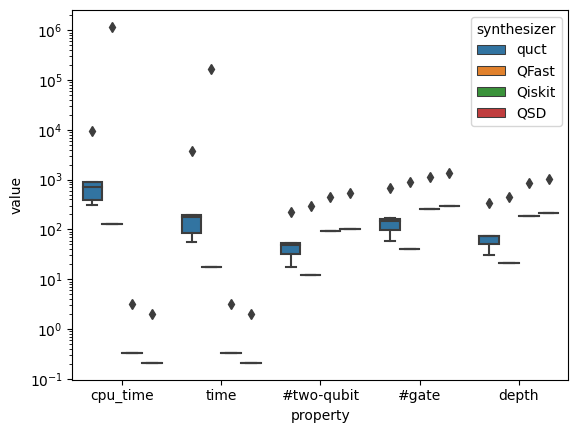

In [234]:
ax = sns.boxplot(x="property", y="value", hue="synthesizer", data=all_result_df)  # RUN PLOT  
ax.set_yscale('log')

In [235]:
for prop_name in ['#two-qubit', 'time', '#gate', 'depth', 'cpu_time']:
    prop_df = all_result_df[all_result_df['property'] == prop_name]

    qfast_df =  np.array(prop_df[prop_df['synthesizer'] == 'QFast']['value'])
    quct =  np.array(prop_df[prop_df['synthesizer'] == 'quct']['value'])

    quct = quct[:len(qfast_df)]
    print(prop_name, float(qfast_df.mean() / quct.mean()),  float(quct.mean() / qfast_df.mean()))
    # print(prop_name, float((qfast_df / quct).mean()),  float( (quct / qfast_df).mean()))

'''似乎还会有qfast没有quct有的'''

#two-qubit 0.8428571428571429 1.1864406779661016
time 38.5157524362666 0.025963402938959476
#gate 0.8426356589147287 1.1867525298988042
depth 0.886435331230284 1.1281138790035588
cpu_time 96.01866937506024 0.01041464130370191


'似乎还会有qfast没有quct有的'

In [236]:
for syn in syn_index:
    if syn == 'DNN':
        continue
    for prop_name in ['#two-qubit', 'time', '#gate', 'depth', 'cpu_time']:
        prop_df = all_result_df[all_result_df['property'] == prop_name]
        # print(syn, prop_name, prop_df[prop_df['synthesizer'] == syn].mean())
        print(syn, prop_name, float(prop_df[prop_df['synthesizer'] == syn].mean()))

quct #two-qubit 70.0
quct time 727.5143067969217
quct #gate 215.0
quct depth 105.66666666666667
quct cpu_time 2043.0220232634886
QFast #two-qubit 59.0
QFast time 28020.760934432346
QFast #gate 181.16666666666666
QFast depth 93.66666666666667
QFast cpu_time 196168.25617770353
Qiskit #two-qubit 151.5
Qiskit time 0.8064412275950114
Qiskit #gate 405.0
Qiskit depth 302.3333333333333
Qiskit cpu_time 0.8064412275950114
QSD #two-qubit 172.16666666666666
QSD time 0.5128959019978842
QSD #gate 472.6666666666667
QSD depth 348.6666666666667
QSD cpu_time 0.5128959019978842


/tmp/ipykernel_2742123/4042622715.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(syn, prop_name, float(prop_df[prop_df['synthesizer'] == syn].mean()))


In [222]:
iter_counts = []
second_per_iters = []
for quct_result in results:
    iter_counts.append(quct_result['iter_count'])
    second_per_iters.append(quct_result['cpu time']/quct_result['iter_count'])
sum(iter_counts) / len(iter_counts), sum(second_per_iters) / len(iter_counts)

(5.944444444444445, 233.5628613478852)

In [223]:
# 全连接的
# #two-qubit 1.3036968576709798 0.7670494824897206
# time 25.544074876468155 0.03914802179511403
# #gate 1.3014678899082568 0.7683631749612294
# depth 1.2660738714090287 0.7898433279308482
# cpu_time 52.435186880049756 0.01907116307771708

In [224]:
len(quct)

5

In [225]:
len(qfast_df)

5

In [226]:
qfast_df =  prop_df[prop_df['synthesizer'] == 'QFast']
qfast_df.mean()

/tmp/ipykernel_2742123/569752527.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  qfast_df.mean()


value    1341.868423
dtype: float64

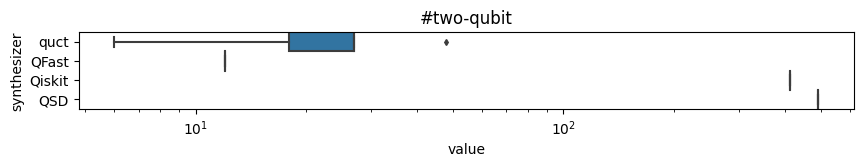

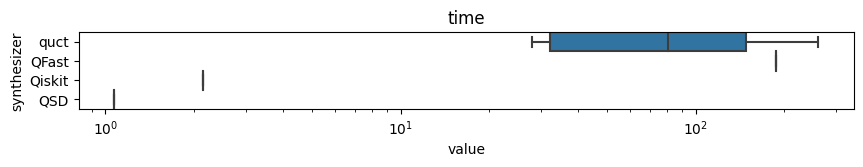

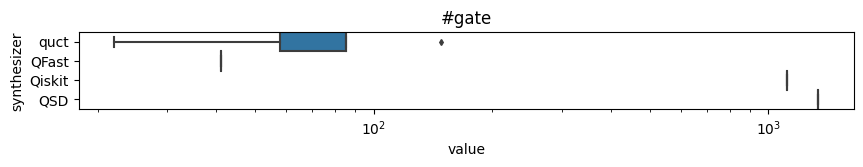

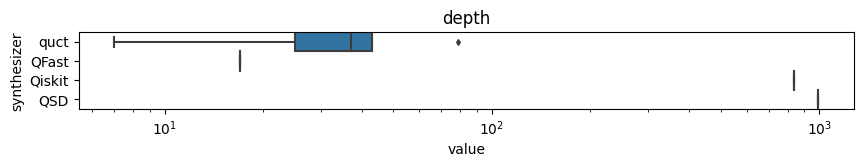

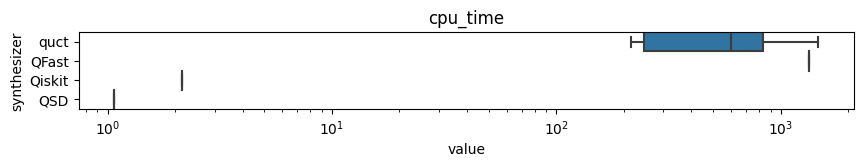

In [227]:
for prop_name in ['#two-qubit', 'time', '#gate', 'depth', 'cpu_time']:
    fig, ax = plt.subplots(figsize =(10, 1))

    plot_data = all_result_df[all_result_df['property'] == prop_name]
    ax = sns.boxplot(x="value", y="synthesizer", data=plot_data, fliersize=3, width =1)  # RUN PLOT # , whis=10
    plt.title(prop_name)
    ax.set_xscale('log')
    fig.show()
    fig.savefig(f'synthesis_evaluation_fig/alg_qubit{n_qubits}_{prop_name}.svg')

   Trial Number     value
0      1      1 -0.750615
1      1      1 -1.715070
2      1      1 -0.963404
3      1      1  0.360856
4      1      1 -1.190504


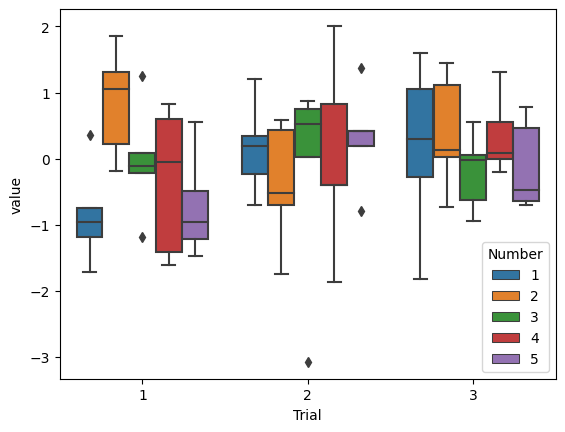

In [100]:
np.random.seed(44)
# DATAFRAMES WITH TRIAL COLUMN ASSIGNED
df1 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=1)
df2 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=2)
df3 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=3)

cdf = pd.concat([df1, df2, df3])                                # CONCATENATE
mdf = pd.melt(cdf, id_vars=['Trial'], var_name=['Number'])      # MELT

print(mdf.head())
#    Trial Number     value
# 0      1      1 -0.750615
# 1      1      1 -1.715070
# 2      1      1 -0.963404
# 3      1      1  0.360856
# 4      1      1 -1.190504

ax = sns.boxplot(x="Trial", y="value", hue="Number", data=mdf)  # RUN PLOT  
plt.show()

plt.clf()
plt.close()